# Importing the Modules

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
from sklearn.model_selection import train_test_split

# Reading the dataset

In [49]:
df = pd.read_csv(r"C:\Users\mitug\ML-Project-Classification\data\predictive_maintenance.csv")

In [50]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Dropping useless Columns

In [51]:
df = df.drop(['UDI','Product ID'],axis=1)

In [52]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# Target Variable Exploration

In [53]:
target = 'Failure Type'

In [54]:
x = df[target].value_counts()
x = x*100/len(df)
x

No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64

In [55]:
categories = list(dict(x).keys())
values = list(dict(x).values())

In [56]:
x['Others'] = 0
for i in range(len(values)):
    if values[i] < 1:
        x['Others'] += values[i]
        x = x.drop(categories[i])
for j in range(len(df)):
    #print(df[target][j])
    if df[target][j] in ["Power Failure","Overstrain Failure","Tool Wear Failure","Random Failures"]:
        df[target][j] = "Others"



C:\Users\mitug\AppData\Local\Temp/ipykernel_21776/3356610591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target][j] = "Others"


In [57]:
set(df[target])

{'Heat Dissipation Failure', 'No Failure', 'Others'}

In [58]:
x

No Failure                  96.52
Heat Dissipation Failure     1.12
Others                       2.36
Name: Failure Type, dtype: float64

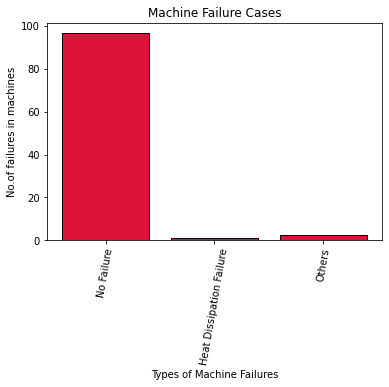

In [59]:
categories = list(dict(x).keys())
values = list(dict(x).values())
plt.bar(categories,values,edgecolor='black',color='crimson')
plt.xticks(rotation=80)
plt.xlabel('Types of Machine Failures')
plt.ylabel('No.of failures in machines')
plt.title('Machine Failure Cases')
plt.show()

# Encoding the Target Variable

In [60]:
df[target]=df[target].replace(["No Failure","Heat Dissipation Failure","Others"],[0,1,2])

# Seggregating Variables

In [61]:
categorical = ["Type"]
numerical = list(set(df.columns).difference(categorical+[target,"Target"]))

In [62]:
categorical

['Type']

In [63]:
numerical

['Rotational speed [rpm]',
 'Air temperature [K]',
 'Process temperature [K]',
 'Tool wear [min]',
 'Torque [Nm]']

# Categorical Variables Exploration

In [64]:
y = dict(df[['Type',target]].value_counts())

In [65]:
y

{('L', 0): 5757,
 ('M', 0): 2916,
 ('H', 0): 979,
 ('L', 2): 169,
 ('L', 1): 74,
 ('M', 2): 51,
 ('M', 1): 30,
 ('H', 2): 16,
 ('H', 1): 8}

In [66]:
columns = list(set(df[target]))
rows = list(set(df['Type']))
a = []
for i in columns:
    temp = []
    for j in rows:
        temp.append(y[(j,i)])
    a.append(temp)
c = pd.DataFrame(a,index=columns,columns=rows)

In [67]:
c

,L,M,H
0,5757,2916,979
1,74,30,8
2,169,51,16


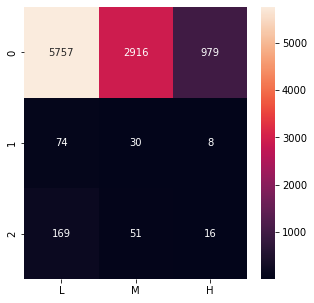

In [68]:
plt.figure(figsize=(5,5))
sns.heatmap(c,annot=True,fmt="d")
plt.show()

# Encoding of Categorical Variables

In [69]:
df['Type'] = df['Type'].replace(['L','M','H'],[0,1,2])

In [70]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0


# Numerical Data Exploration

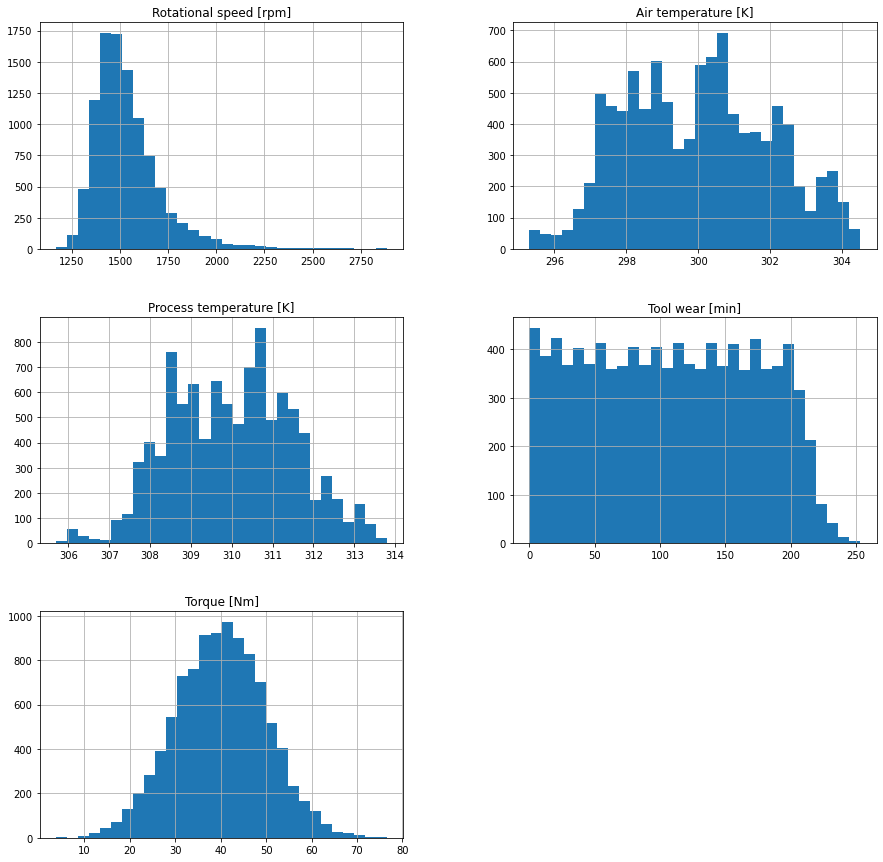

In [71]:
df[numerical].hist(bins=30,figsize=(15,15))
plt.show()

# Test - Train Split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(df,
    df[target],
    test_size = 0.1,
    train_size=0.90,
    random_state = 0
)

In [93]:
X_test.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [94]:
X_train = X_train.drop(['Failure Type','Target'],axis=1)
X_test = X_test.drop(['Failure Type','Target'],axis=1)

In [95]:
y_train

1554    0
2087    0
5470    0
2363    0
7570    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    0
Name: Failure Type, Length: 9000, dtype: int64

# Writing the Train dataset into a CSV file

In [90]:
X_train.join(y_train).to_csv(r"C:\Users\mitug\ML-Project-Classification\data\train.csv")

# Writing the Test dataset into a CSV file

In [91]:
X_test.join(y_test).to_csv(r"C:\Users\mitug\ML-Project-Classification\data\test.csv")